In [1]:
# Depth vs Time transition for U, T in Stratification Runs
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw

In [2]:
def UT_prof(datapath, case_id, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #Uzt = u_ymean[:,:,xidx] # U in z, t dimensions
    Uzt = u0[:,:,:,xidx].mean(2).T
    
    # Potential temp
    Tzt = state.Temp.data[:,:,:,xidx].mean(2).T # Temp in z, t dimensions
    
    depth = state.Z.data
    time = state.T.data / 86400 # Time in days
    
    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Szt = state.S.data[:,:,:,xidx].mean(2).T
    p = np.tile(pres,[len(time),1]).T
    Rho = gsw.rho(Szt, Tzt, p)
    return depth, time, Uzt, Tzt, Rho

In [3]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_nosill'
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_minhs'

caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

# depth, time, U1, T1, Rho1 = UT_prof(path2, caseN, gf)
# depth, time, U2, T2, Rho2 = UT_prof(path2, caseN, sw)
# depth, time, U3, T3, Rho3 = UT_prof(path2, caseN, sc)
# depth, time, U4, T4, Rho4 = UT_prof(path2, caseN, se)

# Compare U evolution at glacier front under different stratification
depth, time, U1, T1, Rho1 = UT_prof(path1, 1, gf)
depth, time, U2, T2, Rho2 = UT_prof(path1, 2, gf)
depth, time, U3, T3, Rho3 = UT_prof(path1, 3, gf)
depth, time, U4, T4, Rho4 = UT_prof(path1, 4, gf)

In [ ]:
depth[22]
#np.max(Rho3-1000), np.min(Rho3-1000), np.mean(Rho3-1000)
#U1.max(), U2.max(), U3.max(), U4.max()
np.linspace(-0.06,0.06,13)

Text(0.5, 0, 'Time [days]')

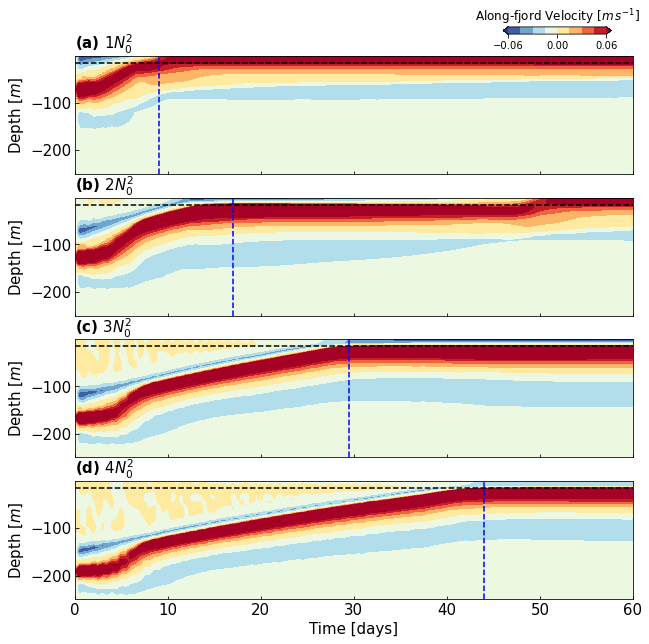

In [7]:
# Making plot for along-fjord velocity U
fig1 = plt.figure(figsize=(10,10))
fig1.tight_layout()  

cu = np.linspace(-0.06,0.06,9) # Contour range for U
crho = np.linspace(10,25,15) # Contour range for density
cmap = 'RdYlBu_r'

hs = 400*0.04
ax1 = fig1.add_subplot(411)
im1 = ax1.contourf(time, depth, U4, cu, cmap=cmap, extend='both')
ax1.axhline(y=-hs,color='k',linestyle='--')
ax1.axvline(x=9,color='b',linestyle='--')

# Plot isopycnals
#CS1 = ax1.contour(time, depth, Rho4-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS1, fmt='%1.1f', fontsize=10, inline=1)

cbaxes = fig1.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([-0.06,0,0.06])
cbar.ax.set_title('Along-fjord Velocity [$m\,s^{-1}$]', size=12)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(-250,depth[0])
ax1.xaxis.set_ticklabels([])
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) $1N_0^2$', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig1.add_subplot(412)
im2 = ax2.contourf(time, depth, U3, cu, cmap=cmap, extend='both')
ax2.axhline(y=-hs,color='k',linestyle='--')
ax2.axvline(x=17,color='b',linestyle='--')

#CS2 = ax2.contour(time, depth, Rho3-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS2, fmt='%1.1f', fontsize=10, inline=1)


ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(-250,depth[0])
ax2.xaxis.set_ticklabels([])
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) $2N_0^2$', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig1.add_subplot(413)
im3 = ax3.contourf(time, depth, U2, cu, cmap=cmap, extend='both')
#ax3.axhline(y=-16,color='k',linestyle='--')
# CS3 = ax3.contour(time, depth[:22], Rho3[:22,:]-1000, crho, colors='k', linewidths=.5) # hs=18, depth_ind=7
ax3.axhline(y=-hs,color='k',linestyle='--')
ax3.axvline(x=29.5,color='b',linestyle='--')

#CS3 = ax3.contour(time, depth, Rho2-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS3, fmt='%1.1f', fontsize=10, inline=1)


ax3.set_xlim(time[0],time[-1])
#ax3.set_ylim(depth[8],depth[0])
#ax3.set_ylim(-50,depth[0])
ax3.set_ylim(-250,depth[0])
#ax3.xaxis.set_visible(False)
ax3.xaxis.set_ticklabels([])
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) $3N_0^2$', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig1.add_subplot(414)
im4 = ax4.contourf(time, depth, U1, cu, cmap=cmap, extend='both')
#CS4 = ax4.contour(time, depth[:-1], Rho4[:-1,:]-1000, crho, colors='k', linewidths=.5)
#CS4 = ax4.contour(time, depth, Rho1-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS4, fmt='%1.1f', fontsize=10, inline=1)
ax4.axhline(y=-hs,color='k',linestyle='--')
ax4.axvline(x=44,color='b',linestyle='--')

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(-250,depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) $4N_0^2$', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

In [5]:
ta_est = [6.9, 20.5, 33.1, 44.4]
ta_obs = [9.0, 17.0, 29.5, 44.0] # see Strat_Transition

corr_matrix2 = np.corrcoef(ta_obs,ta_est)
corr2 = corr_matrix2[0,1]
R_sq2 = corr2**2
print(R_sq2)

0.9729531849335581


Text(5, 40, '$r^2=0.97$')

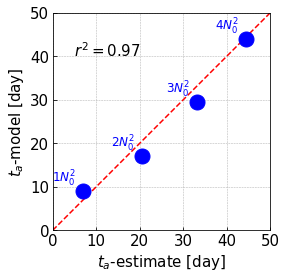

In [6]:
# Plot plume ascending time from theory vs model
fig2, ax1 =plt.subplots(figsize=(4,4))


ax1.set(xlim=(0, 50), ylim=(0, 50))
plt.axis('square')
plt.grid(ls='--', lw=.5)
plt.xlabel(r'$t_{a}$-estimate [day]', size=15)
plt.ylabel(r'$t_{a}$-model [day]', size=15)
ax1.set_xticks([0, 10, 20, 30, 40 ,50])
ax1.set_yticks([0, 10, 20, 30, 40 ,50])
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="--", lw=1.5, c="r")
ax1.tick_params(direction='in', labelsize=15)


ax1.plot(ta_est, ta_obs, 'o', ms=15, c='b')
label = ['$1N_0^2$', '$2N_0^2$', '$3N_0^2$', '$4N_0^2$']
for i in range(len(ta_est)):
     plt.text(x=ta_est[i]-7,y=ta_obs[i]+2,s=label[i], 
          fontdict=dict(color='b',size=12))

plt.text(5, 40, r'$r^2=0.97$', fontsize=15)

In [86]:
time.shape, U4.shape

((121,), (90, 121))

Text(5, 40, '$r^2=0.97$')

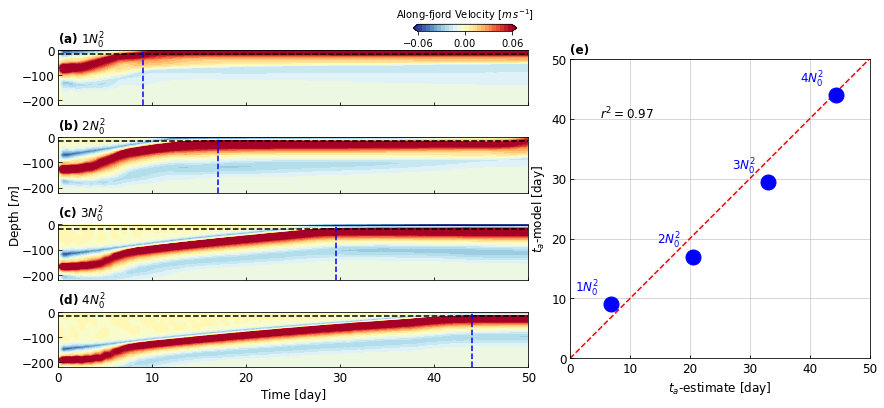

In [110]:
# Merge Fig1, Fig2
gridsize = (4, 5)
fig3 = plt.figure(figsize=(12, 5))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=3)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=3)
ax3 = plt.subplot2grid(gridsize, (2, 0), colspan=3)
ax4 = plt.subplot2grid(gridsize, (3, 0), colspan=3)
ax5 = plt.subplot2grid(gridsize, (0, 3), colspan=2, rowspan=4)
fig3.tight_layout()

cu = np.linspace(-0.06,0.06,25) # Contour range for U
cmap = 'RdYlBu_r'

hs = 400*0.04
im1 = ax1.contourf(time[:-20], depth, U4[:,:-20], cu, cmap=cmap, extend='both')
ax1.axhline(y=-hs,color='k',linestyle='--')
ax1.axvline(x=9,color='b',linestyle='--')

cbaxes = fig3.add_axes([0.45, 1.01, 0.12, 0.02])
cbar = fig3.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([-0.06,0,0.06])
cbar.ax.set_title('Along-fjord Velocity [$m\,s^{-1}$]', size=10)

ax1.set_xlim(time[0],time[-21])
ax1.set_ylim(-220,depth[0])
ax1.xaxis.set_ticklabels([])
ax1.tick_params(direction='in', labelsize=12)
ax1.set_yticks([0, -100, -200])
ax1.set_title('(a) $1N_0^2$', loc='left', size=12, weight='bold')
#ax1.set_ylabel('Depth [$m$]', size=12)


im2 = ax2.contourf(time[:-20], depth, U3[:,:-20], cu, cmap=cmap, extend='both')
ax2.axhline(y=-hs,color='k',linestyle='--')
ax2.axvline(x=17,color='b',linestyle='--')

#CS2 = ax2.contour(time, depth, Rho3-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS2, fmt='%1.1f', fontsize=10, inline=1)

ax2.set_xlim(time[0],time[-21])
ax2.set_ylim(-220,depth[0])
ax2.xaxis.set_ticklabels([])
ax2.set_yticks([0, -100, -200])
ax2.tick_params(direction='in', labelsize=12)
ax2.set_title('(b) $2N_0^2$', loc='left', size=12, weight='bold')
#ax2.set_ylabel('Depth [$m$]', size=12)
fig3.text(-0.01, 0.5, 'Depth [$m$]', size=12, ha='center', va='center', rotation='vertical')

im3 = ax3.contourf(time[:-20], depth, U2[:,:-20], cu, cmap=cmap, extend='both')
ax3.axhline(y=-hs,color='k',linestyle='--')
ax3.axvline(x=29.5,color='b',linestyle='--')

#CS3 = ax3.contour(time, depth, Rho2-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS3, fmt='%1.1f', fontsize=10, inline=1)

ax3.set_xlim(time[0],time[-21])
ax3.set_ylim(-220,depth[0])
ax3.xaxis.set_ticklabels([])
ax3.tick_params(direction='in', labelsize=12)
ax3.set_yticks([0, -100, -200])
ax3.set_title('(c) $3N_0^2$', loc='left', size=12, weight='bold')
#ax3.set_ylabel('Depth [$m$]', size=12)


im4 = ax4.contourf(time[:-20], depth, U1[:,:-20], cu, cmap=cmap, extend='both')
#CS4 = ax4.contour(time, depth[:-1], Rho4[:-1,:]-1000, crho, colors='k', linewidths=.5)
#CS4 = ax4.contour(time, depth, Rho1-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS4, fmt='%1.1f', fontsize=10, inline=1)
ax4.axhline(y=-hs,color='k',linestyle='--')
ax4.axvline(x=44,color='b',linestyle='--')

ax4.set_xlim(time[0],time[-21])
ax4.set_ylim(-220,depth[0])
ax4.tick_params(direction='in', labelsize=12)
ax4.set_yticks([0, -100, -200])
ax4.set_title('(d) $4N_0^2$', loc='left', size=12, weight='bold')
#ax4.set_ylabel('Depth [$m$]', size=12)
ax4.set_xlabel('Time [day]', size=12)




ax5.set(xlim=(0, 50), ylim=(0, 50))
ax5.axis('square')
ax5.grid(lw=.5)
ax5.set_title('(e)', loc='left', size=12, weight='bold')
ax5.set_xlabel(r'$t_{a}$-estimate [day]', size=12)
ax5.set_ylabel(r'$t_{a}$-model [day]', size=12)
ax5.set_xticks([0, 10, 20, 30, 40 ,50])
ax5.set_yticks([0, 10, 20, 30, 40 ,50])
ax5.plot(ax5.get_xlim(), ax5.get_ylim(), ls="--", lw=1.5, c="r")
ax5.tick_params(direction='in', labelsize=12)


ax5.plot(ta_est, ta_obs, 'o', ms=15, c='b')
label = ['$1N_0^2$', '$2N_0^2$', '$3N_0^2$', '$4N_0^2$']
for i in range(len(ta_est)):
     ax5.text(x=ta_est[i]-6,y=ta_obs[i]+2,s=label[i], 
          fontdict=dict(color='b',size=12))

ax5.text(5, 40, r'$r^2=0.97$', fontsize=12)

In [ ]:
#U1.shape, time.shape, depth[7], hs
umax1 = np.ones(len(time))* np.nan
umax2 = np.ones(len(time))* np.nan
umax3 = np.ones(len(time))* np.nan
umax4 = np.ones(len(time))* np.nan
for i in range(len(time)):
    umax1[i] = np.argmax(U1[:,i])
    umax2[i] = np.argmax(U2[:,i])
    umax3[i] = np.argmax(U3[:,i])
    umax4[i] = np.argmax(U4[:,i])

#print(umax1, umax2, umax3, umax4)
# Day time for the maximum U to reach the sill height
time[umax1==9][0], time[umax2==9][0], time[umax3==10][0], time[umax4==9][0]

In [ ]:
# Making plot for potential temperature
fig2 = plt.figure(figsize=(10,10))
fig2.tight_layout()  

ct = np.linspace(8,10,20) # Contour range for T
crho1 = np.linspace(10,25,15) # Contour range for density
crho2 = np.linspace(16,20,15) 


#cmap2 = 'YlGnBu_r'
import cmocean
cmap2 = cmocean.cm.thermal

ax1 = fig2.add_subplot(411)
im1 = ax1.contourf(time, depth, T1, ct, cmap=cmap2)
# Plot isopycnals
CS1 = ax1.contour(time, depth, Rho1-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)
#ax1.axhline(y=-hs,color='k',linestyle='--')

cbaxes = fig2.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig2.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([8,8.5,9,9.5,10])
cbar.ax.set_title('T [$^\circ C$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(-400,depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) $h_s/h_f=1$', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig2.add_subplot(412)
im2 = ax2.contourf(time, depth, T2, ct, cmap=cmap2)
CS2 = ax2.contour(time, depth, Rho2-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)
ax2.axhline(y=-hs,color='k',linestyle='--')

ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(-400,depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig2.add_subplot(413)
im3 = ax3.contourf(time, depth, T3, ct, cmap=cmap2)
#ax3.axhline(y=-16,color='k',linestyle='--')
CS3 = ax3.contour(time, depth[:22], Rho3[:22,:]-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

ax3.set_xlim(time[0],time[-1])
ax3.set_ylim(-50,depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig2.add_subplot(414)
im4 = ax4.contourf(time, depth, T4, ct, cmap=cmap2)
CS4 = ax4.contour(time, depth[:-1], Rho4[:-1,:]-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)
ax4.axhline(y=-hs,color='k',linestyle='--')

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(-400,depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + '/1N0-maxhs_Utime.png', dpi=300, bbox_inches='tight')
#fig2.savefig(fig_path + '/3N0-minhs_Ttime.png', dpi=300, bbox_inches='tight') 

In [ ]:
def plume_rising_rate(datapath, case_id):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    
    time = state.T.data / 86400 # Time in days
    depth = state.Z.data
    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #Uzt = u_ymean[:,:,xidx] # U in z, t dimensions
    xidx = 6 # near glacier front
    Uzt = u0[:,:,:,xidx].mean(2)
    
    count = 0
    Upos = np.empty(Uzt.shape[0])
    for i in range(Uzt.shape[0]):
        if np.any(Uzt[i, :]>0):
            Upos[i] = np.where(Uzt[i, :] == Uzt[i, :].max())[-1][0]
        else:
            Upos[i] = 'nan'
#         if Upos[i] >= Upos[i-1]:
#             count += 1
#         else:
#             pass
    return depth, time, Uzt, Upos

In [ ]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
caseN = np.array([1,2,3,4,5])

depth, time, Uz0, Up0 = plume_rising_rate(path1, caseN[0])
depth, time, Uz1, Up1 = plume_rising_rate(path1, caseN[1])
depth, time, Uz2, Up2 = plume_rising_rate(path1, caseN[2])
depth, time, Uz3, Up3 = plume_rising_rate(path1, caseN[3])
depth, time, Uz4, Up4 = plume_rising_rate(path1, caseN[4])

In [ ]:
print(Up0,'\n', Up1,'\n', Up2,'\n', Up3, '\n', Up4)

In [ ]:
np.where(Up0==9)[-1][0], np.where(Up1==9)[-1][0], np.where(Up2==10)[-1][0], np.where(Up3==0)[-1][0]

In [ ]:
rate0 = (depth[9]-depth[55]) / (time[88]-time[1])
rate1 = (depth[9]-depth[50]) / (time[59]-time[1])
rate2 = (depth[10]-depth[41]) / (time[34]-time[1])
rate3 = (depth[0]-depth[27]) / (time[23]-time[1])

In [ ]:
print(rate0, rate1, rate2, rate3)

In [ ]:
def Qsm_factors(datapath, case_id):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45), T=range(1,len(State.T)))
    
    depth = state.Z.data
    time = state.T.data / 86400 # Time in days
    
    xid = 1
    # Potential temp
    Ttz = state.Temp.data[:,:,:,xid].mean(2) # Temp

    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Stz = state.S.data[:,:,:,xid].mean(2)
    p = np.tile(pres,[len(time),1])
    Rho = gsw.rho(Stz, Ttz, p)
    
    N2, Pmid = gsw.Nsquared(Stz,Ttz,pres,55,axis=1)
    
    
    # Grid areas    
    Area = np.empty(90)
    Area[:20] = 400
    Area[20:50] = 800
    Area[50:] = 1200

    file0 = xr.open_dataset(datapath + '/icefrntA_' + str(format(case_id,'03d')) + '.nc')
    # removed duplicated data caused by model restart
    file = file0.isel(T=~file0.get_index("T").duplicated())
    ip_state = file.isel(Y=range(35,45))
    
    MR = ip_state.icefrntA.isel(X=1).data.mean(2) # Melt rate at the icefront
    Qsm = (MR*Area*10) / (24*3600)
    
    return depth, time, Qsm, Ttz, N2, Rho

In [ ]:
# Compare shallow- and no-sill cases
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_nosill'
caseN = 4
z1, time, Qsm1, T1, N1, Rho1 = Qsm_factors(path1, caseN)
z2, time, Qsm2, T2, N2, Rho2 = Qsm_factors(path2, caseN)

In [ ]:
# Compare results with/without shallow sill, model outputs averaged over last 14 days
Qsm_s, Qsm_ns = 8.87824692, 7.81707443
Tice_s, Tice_ns = 9.09636703, 9.86293875
T0 = 0
dTF = (Tice_s-T0) / (Tice_ns-T0)
dQsm = Qsm_s / Qsm_ns

In [ ]:
# Time-mean
ti = 89
zi = -10 # Exclude bottom layer
rho1 = Rho1[ti:,:zi].mean(0)
rho2 = Rho2[ti:,:zi].mean(0)
Rhoz1 = np.gradient(rho1, -1*z1[:zi])
Rhoz2 = np.gradient(rho2, -1*z2[:zi])
dstrat1 = np.sqrt(Rhoz1.mean()/Rhoz2.mean())

dstrat2 = (N1[ti:,:zi].mean()/N2[ti:,:zi].mean())**(5/8)

H = np.empty(90)
H[:20] = 2
H[20:50] = 4
H[50:] = 6
theta1 = np.sum(T1[ti:,:zi].mean(0)*H[:zi]) / H[:zi].sum()
theta2 = np.sum(T2[ti:,:zi].mean(0)*H[:zi]) / H[:zi].sum()
theta0 = 0.0
dtheta = (theta1-theta0)/(theta2-theta0)

M1 = np.sum(Qsm1[ti:,:zi].mean(0))
M2 = np.sum(Qsm2[ti:,:zi].mean(0))
dM = M1/M2

#print(dstrat1, dtheta, dtheta/dstrat1, dM)
print(dTF, dstrat1, dstrat2, dTF/dstrat1, dTF/dstrat2, dQsm)

In [ ]:
# Melt rate scaling
zi = -10
Rhoz1 = np.gradient(Rho1[-1,:zi], -1*z1[:zi]).mean()
Rhoz2 = np.gradient(Rho2[-1,:zi], -1*z2[:zi]).mean()

dstrat1 = np.sqrt(Rhoz1/Rhoz2)
bfreq1 = N1[-1,:-11].mean()
bfreq2 = N2[-1,:-11].mean()
# bfreq1 = np.sum(N1[-1,:-10]*H[:-10]) / H[:-10].sum()
# bfreq2 = np.sum(N2[-1,:-10]*H[:-10]) / H[:-10].sum()
dstrat2 = (bfreq1/bfreq2)**(5/8)
# Grid heights    
H = np.empty(90)
H[:20] = 2
H[20:50] = 4
H[50:] = 6
M1 = Qsm1[-1,:zi].sum()
M2 = Qsm2[-1,:zi].sum()
dM = M1/M2

theta1 = np.sum(T1[-1,:zi]*H[:zi]) / H[:zi].sum()
theta2 = np.sum(T2[-1,:zi]*H[:zi]) / H[:zi].sum()
theta0 = 0 # Freezing temp of seawater
dtheta = (theta1-theta0)/(theta2-theta0)
#print(Rhoz1, Rhoz2, theta1, theta2, M1, M2)
print(dstrat1, dtheta, dtheta/dstrat1, dM)
#Rhoz1[:-9]/Rhoz2[:-9]

In [ ]:
# Making plot 
fig3 = plt.figure(figsize=(12,6))
fig3.tight_layout()  

depth = z1
cmr = np.linspace(0,0.2,20) # Contour range for melting
ct = np.linspace(8,10,20) # Contour range for T
cN = np.linspace(0,5,20) # Contour range for N2
crho = np.linspace(10,25,15) # Contour range for density

#cmap2 = 'YlGnBu_r'
import cmocean
cmap2 = cmocean.cm.thermal

### Qsm Plot
ax1 = fig3.add_subplot(321)
im1 = ax1.contourf(time, depth, Qsm1.T, cmr, cmap='RdYlBu_r')
#ax1.axhline(y=-hs,color='k',linestyle='--')

# Isopycnals
CS1 = ax1.contour(time, depth, Rho1.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes1 = fig3.add_axes([0.92, 0.7, 0.02, 0.2])
cbar1 = fig3.colorbar(im1,cax=cbaxes1, orientation='vertical')
cbar1.set_ticks([0, 0.1, 0.2])
cbar1.ax.set_title('$Q_{sm}$ [$m^3\,s^{-1}$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(-400,depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_yticks([depth[0], -200, depth[-1]])
ax1.set_yticklabels(["0","-200","-400"])
ax1.set_title('(a)', loc='left', size=15, weight='bold')
ax1.set_title('$1N_0^2, h_s/h_f=0.04$', loc='center', size=15)
ax1.set_ylabel('Depth [$m$]', size=15)


ax2 = fig3.add_subplot(322)
im2 = ax2.contourf(time, depth, Qsm2.T, cmr, cmap='RdYlBu_r')
#ax1.axhline(y=-hs,color='k',linestyle='--')

# Plot isopycnals
CS2 = ax2.contour(time, depth, Rho2.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(-400,depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_yticks([depth[0], -200, depth[-1]])
ax2.set_yticklabels(["0","-200","-400"])
ax2.set_title('(b)', loc='left', size=15, weight='bold')
ax2.set_title('$1N_0^2, h_s/h_f=1$', loc='center', size=15)

#ax2.set_ylabel('Depth [$m$]', size=15)


### Temp Plot
ax3 = fig3.add_subplot(323)
im3 = ax3.contourf(time, depth, T1.T, ct, cmap=cmap2)
# Plot isopycnals
CS3 = ax3.contour(time, depth, Rho1.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)
#ax1.axhline(y=-hs,color='k',linestyle='--')

cbaxes2 = fig3.add_axes([0.92, 0.4, 0.02, 0.2])
cbar2 = fig3.colorbar(im3,cax=cbaxes2, orientation='vertical')
cbar2.set_ticks([8,9,10])
cbar2.ax.set_title('T [$^\circ C$]', size=15)

ax3.set_xlim(time[0],time[-1])
ax3.set_ylim(-400,depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_yticks([depth[0], -200, depth[-1]])
ax3.set_yticklabels(["0","-200","-400"])
ax3.set_title('(c)', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)


ax4 = fig3.add_subplot(324)
im4 = ax4.contourf(time, depth, T2.T, ct, cmap=cmap2)
# Plot isopycnals
CS4 = ax4.contour(time, depth, Rho2.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)
#ax1.axhline(y=-hs,color='k',linestyle='--')

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(-400,depth[0])
ax4.xaxis.set_visible(False)
ax4.tick_params(direction='in', labelsize=15)
ax4.set_yticks([depth[0], -200, depth[-1]])
ax4.set_yticklabels(["0","-200","-400"])
ax4.set_title('(d)', loc='left', size=15, weight='bold')

### Strat. Plot
ax5 = fig3.add_subplot(325)
im5 = ax5.contourf(time, depth[:-1], N1.T*1e5, cN, cmap='YlGnBu_r', extend='max')
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS5 = ax5.contour(time, depth, Rho1.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)

cbaxes3 = fig3.add_axes([0.92, 0.11, 0.02, 0.2])
cbar3 = fig3.colorbar(im5,cax=cbaxes3, orientation='vertical')
cbar3.set_ticks([0, 2.5, 5])
cbar3.ax.set_title(r'$N^2\,(\times 10^{-5}\,s^{-2})$', size=15)

ax5.set_xlim(time[0],time[-1])
ax5.set_ylim(depth[-1],depth[0])
ax5.tick_params(direction='in', labelsize=15)
ax5.set_yticks([depth[0], -200, depth[-1]])
ax5.set_yticklabels(["0","-200","-400"])
ax5.set_title(r'(e)', loc='left', size=15, weight='bold')
ax5.set_xlabel('Time [days]', size=15)
ax5.set_ylabel('Depth [$m$]', size=15)

ax6 = fig3.add_subplot(326)
im6 = ax6.contourf(time, depth[:-1], N2.T*1e5, cN, cmap='YlGnBu_r', extend='max')
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS6 = ax6.contour(time, depth, Rho2.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)

ax6.set_xlim(time[0],time[-1])
ax6.set_ylim(depth[-1],depth[0])
ax6.tick_params(direction='in', labelsize=15)
ax6.set_yticks([depth[0], -200, depth[-1]])
ax6.set_yticklabels(["0","-200","-400"])
ax6.set_title(r'(f)', loc='left', size=15, weight='bold')
ax6.set_xlabel('Time [days]', size=15)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.4)

In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + 'Ugf_T_N2_comp.png', dpi=300, bbox_inches='tight')
#fig3.savefig(fig_path + 'Qsm_T_N2_comp.png', dpi=300, bbox_inches='tight')